In [1]:
# 데이터 불러오기 
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 # 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings 
warnings.filterwarnings(action='ignore')

In [6]:
# 데이터셋 불러오기 
train_df  = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# 모델 적용의 일관성을 위해 train 과 test를 합한 combine 도 지정
combine = [train_df, test_df]

In [11]:
# print(combine) # 리스트 형태. dataframe의 형태 아님

# print(train_df.info())  # dataframe

In [14]:
 # 데이터 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_df.info()
# 전체 12 col, 891개 index 존재
# 자료들은 non-null 하고, 몇개 빼고는 int나 float 의 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# 테스트 자료 정보 
test_df.info() 
# 생존 여부 행이 빠져 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
 ### 데이터 분석

In [18]:
# train 자료 int, float 통계치 
# int와 float형태의 숫자형만 자동으로 계산해줌
train_df.describe()

# 훈련샘플치 count : 891개
# 생존률 0.38 -> 38%
# age min 이 왜 0.42? 1살도 안된 애기도 있단건가 max는 80세

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# 훈련 자료 object 변수 통계치 
train_df.describe(include = ['O'])
# 대문자 alphabet o 임

# sex의 top이 male이고 freq 577 : 남성이 577명
# 승선지 Embaerked 의 top이 S이고 freq이 644명 : S 로 가는 승선지 644

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frolicher, Miss. Hedwig Margaritha",male,1601,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# 변수별 생존율 비교 
# Pclass/Sex/SibSp/Age/Parch/Ticket/Fare/Cabin/Embarked

In [28]:
# Pclass
# groupby를 Pclass로 하고 보여줄 결과는 Pclass와 Survivied

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# groupby에 as_index F 하면 Pclass를 index로 사용하지 않음.
# survivied(생존률)에 대해 내림차순. 객실 등급이 높을수록 생존율이 높음 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [33]:
# Sex
train_df[['Sex', 'Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending=False)

 # 여자일수록 생존율이 높음
 # 인류애 생긴다

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [34]:
# SibSp
train_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)    
# 형제자매와 배우자 수가 적을수록 생존율이 낮음

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
Parch/Ticket/Fare/Cabin/Embarked

In [36]:
# Parch
train_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# 가족과 아이들이 적을수록 생존율이 높음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [37]:
# Age - 분포를 확인할 필요가 있음
train_df[['Age', 'Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


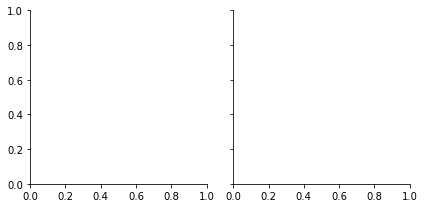

In [38]:
# column을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col = 'Survived')

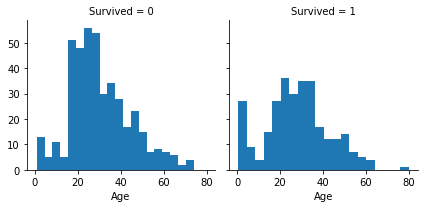

In [40]:
# 히스토그램으로 시각화, 연령의 분포 확인, 히스토그램 bin=20으로 설정. bins로 설정해야 돼
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins=20)
# 약 4세 이하의 생존율이 높음
# 15세 ~ 25세 승객들의 생존율이 높음


In [ ]:
# 훈련 자료에서 Pclass와 생존여부에 따른 연령별 분포

# 열을 생존여부, 행과 색을 객실 등급으로 나눔.
# col = Survived / row = Pclass / hue(색) = Pclass
# width = height * aspect

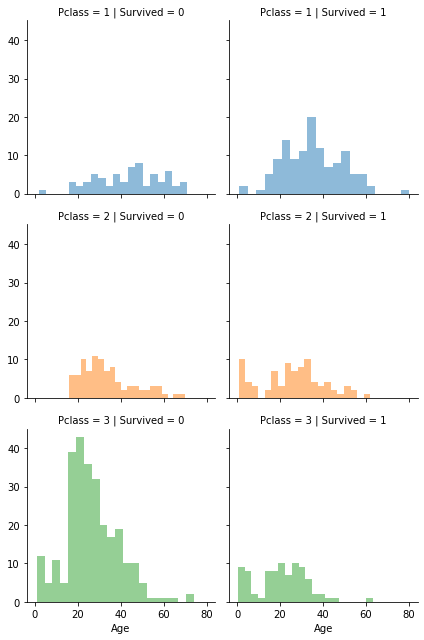

In [42]:
grid = sns.FacetGrid(train_df, col = 'Survived',row = 'Pclass', hue = 'Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

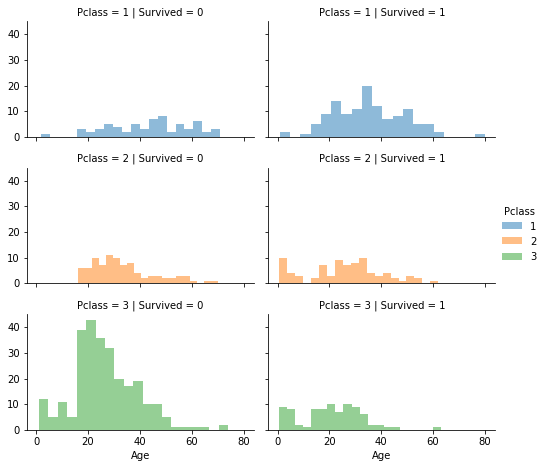

In [43]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5
grid.add_legend();